### Ejemplos tomados de un tutorial de sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.rcParams['figure.figsize'] = (20, 10)
pd.set_option('display.max_columns', 500)

In [2]:
import sklearn
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

/home/qsergio/miniconda3/envs/prueba/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence
/home/qsergio/miniconda3/envs/prueba/lib/python3.7/site-packages/sklearn/feature_extraction/dict_vectorizer.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/home/qsergio/miniconda3/envs/prueba/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [3]:
df = pd.read_csv("bank.csv")

In [4]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [8]:
df["class"].value_counts(normalize=True)

0    0.555394
1    0.444606
Name: class, dtype: float64

In [18]:
X = df[["variance","entropy", "skewness"]]
y = df["class"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

In [20]:
multi_log = linear_model.LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, max_iter=150,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
multi_log.fit(X_train, y_train)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=150, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
y_pred = multi_log.predict(X_test)

In [23]:
y_pred_p = multi_log.predict_proba(X_test)

In [24]:
print("Y el accuracy es:",
metrics.accuracy_score(y_test, y_pred)*100)

Y el accuracy es: 87.61384335154827


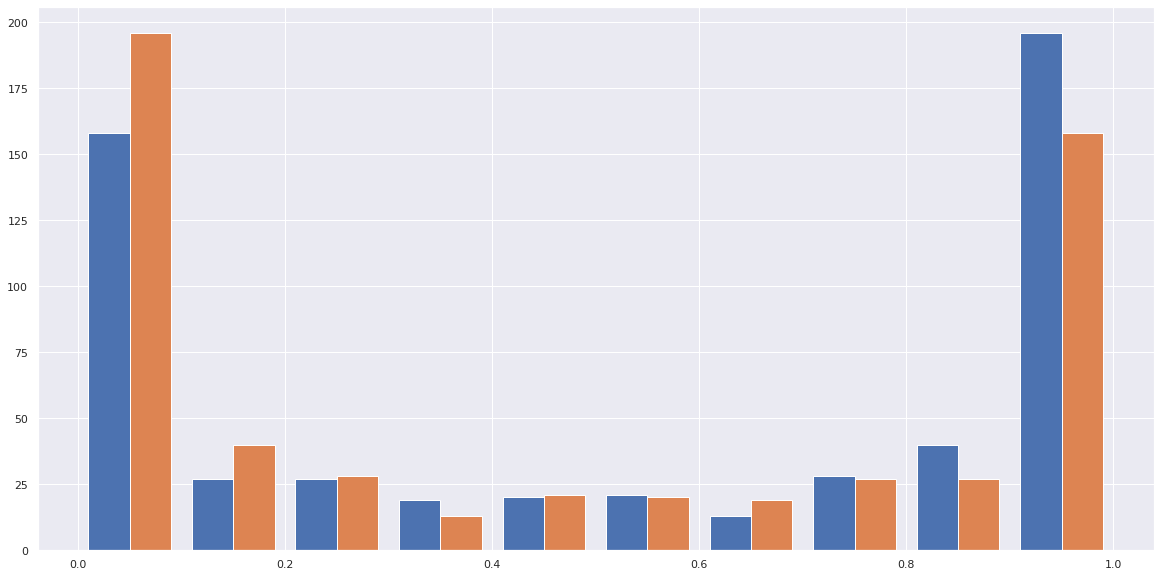

In [25]:
import matplotlib.pyplot as plt
plt.hist(y_pred_p)
plt.show()

In [27]:

matriz_confusion = metrics.confusion_matrix(y_test, y_pred)
matriz_confusion

array([[270,  40],
       [ 28, 211]])

In [29]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8761384335154827
Precision: 0.8406374501992032
Recall: 0.8828451882845189


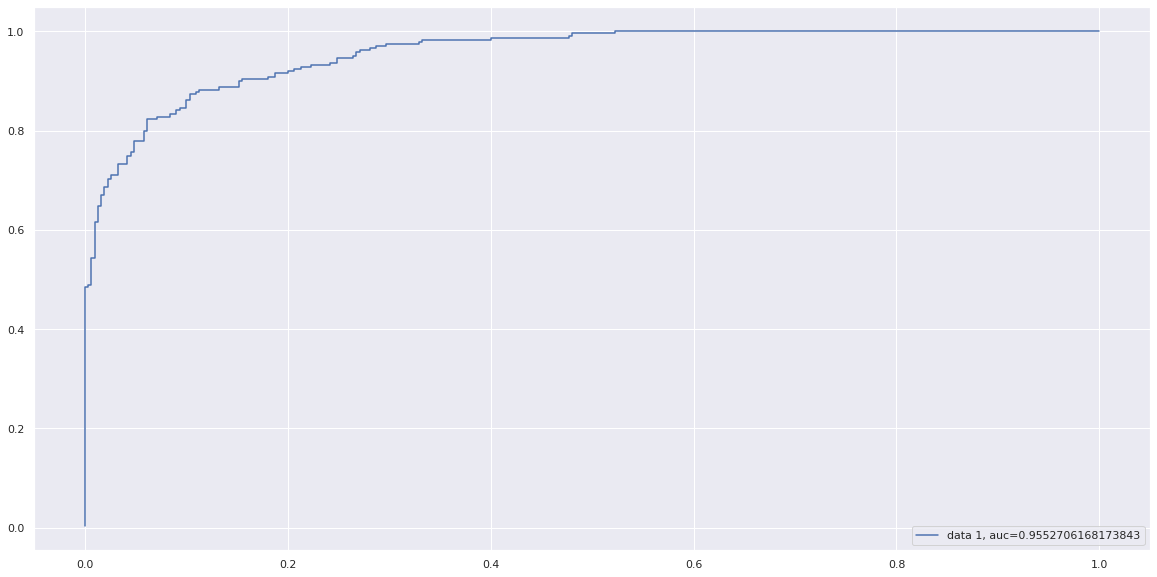

In [30]:
y_pred_proba = multi_log.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()